In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/anaconda/envs/py35/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("/Users/cesare.chung/Downloads/binary.csv")
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [3]:
df.columns = ["admit", "gre", "gpa", "prestige"]
df.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

In [6]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


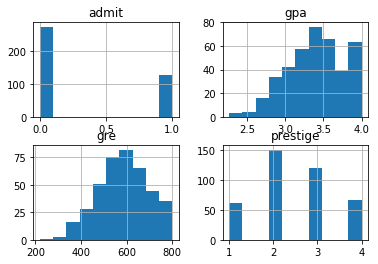

In [7]:
df.hist()
pl.show()

In [8]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [9]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data.head()

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [10]:
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [11]:
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [12]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
train_cols

Index(['gre', 'gpa', 'prestige_2', 'prestige_3', 'prestige_4', 'intercept'], dtype='object')

In [13]:
logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      394
Method:                           MLE   Df Model:                            5
Date:                Tue, 07 Nov 2017   Pseudo R-squ.:                 0.08292
Time:                        20:34:54   Log-Likelihood:                -229.26
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                 7.578e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
gre            0.0023      0.001      2.070      0.038       0.000       0.004
gpa            0.8040      0.332      2.423      0.015       0.154       1.454
prestige_2    -0.6754      0.316     -2.134      0.033      -1.296      -0.055
prestige_3    -1.3402      0.345     -3.881      0.000      -2.017      -0.663
prestige_4    -1.5515      0.418     -3.713      0.000      -2.370      -0.733
intercept     -3.9900      1.140     -3.500      0.000      -6.224      -1.756
==============================================================================
"""

In [15]:
result.conf_int()

,0,1
gre,0.000120,0.004409
gpa,0.153684,1.454391
prestige_2,-1.295751,-0.055135
prestige_3,-2.016992,-0.663416
prestige_4,-2.370399,-0.732529
intercept,-6.224242,-1.755716


In [16]:
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

In [17]:
# odds ratios and 95% CI
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
gre,1.000120,1.004418,1.002267
gpa,1.166122,4.281877,2.234545
prestige_2,0.273692,0.946358,0.508931
prestige_3,0.133055,0.515089,0.261792
prestige_4,0.093443,0.480692,0.211938
intercept,0.001981,0.172783,0.018500


In [18]:
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print(gres)

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print(gpas)


[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]
